In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./archive/guardian_headlines.csv")

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

In [38]:
df.head(10)

,Time,Headlines
0,2020-07-18,Johnson is asking Santa for a Christmas recovery
1,2020-07-18,‘I now fear the worst’: four grim tales of wor...
2,2020-07-18,Five key areas Sunak must tackle to serve up e...
3,2020-07-18,Covid-2019 leaves firms ‘fatally ill-prepared’...
4,2020-07-18,The Week in Patriarchy \r\n\r\n\r\n Bacardi'...
5,2020-07-18,English councils call for smoking ban outside ...
6,2020-07-18,Can Tesla justify a $300bn valuation?
7,2020-07-18,Empty city centres: 'I’m not sure it will ever...
8,2020-07-18,Democratising finance for all? An investment a...
9,2020-07-18,"Homebuyer loses £300,000 to fraudsters – but g..."


In [40]:
review_df = df[['Headlines']]

print(review_df.shape)
review_df.head(5)

(17800, 1)


,Headlines
0,Johnson is asking Santa for a Christmas recovery
1,‘I now fear the worst’: four grim tales of wor...
2,Five key areas Sunak must tackle to serve up e...
3,Covid-2019 leaves firms ‘fatally ill-prepared’...
4,The Week in Patriarchy \r\n\r\n\r\n Bacardi'...


In [41]:
first_row = df.head(1)

last_row = df.tail(1)

In [42]:
# Filter data within the specified time frame
start_date = pd.to_datetime('2019-07-01')
end_date = pd.to_datetime('2020-07-01')
df_filtered = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)]

In [43]:
from textblob import TextBlob

# Perform sentiment analysis on headlines
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def sentiment_binning(sentiment):
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to filtered headlines
df_filtered['Sentiment Score'] = df_filtered['Headlines'].apply(analyze_sentiment)

df_filtered['Sentiment'] = df_filtered['Sentiment Score'].apply(sentiment_binning)

C:\Users\baruchfrost\AppData\Local\Temp\ipykernel_25712\2350247784.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sentiment Score'] = df_filtered['Headlines'].apply(analyze_sentiment)
C:\Users\baruchfrost\AppData\Local\Temp\ipykernel_25712\2350247784.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sentiment'] = df_filtered['Sentiment Score'].apply(sentiment_binning)


In [44]:
sentiment_score_data = df_filtered[["Time", "Sentiment Score"]]
sentiment_score_data.set_index("Time", inplace=True)

sentiment_score_data_by_day = sentiment_score_data.groupby("Time")['Sentiment Score'].apply(list)

numpy_sentiment_score_data_by_day = sentiment_score_data_by_day.to_numpy()

raw_dates = sentiment_score_data_by_day.index.tolist()

formatted_dates = []

for date in raw_dates:
    formatted_dates.append(date.strftime("%Y-%m-%d"))


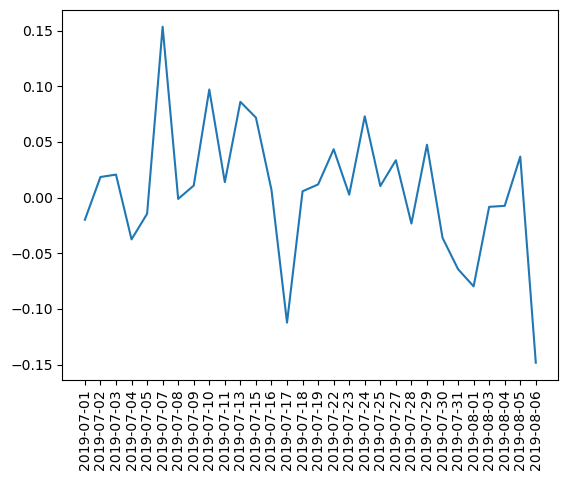

In [45]:
avg_sentiment = []

for item in numpy_sentiment_score_data_by_day:
    arr = np.array(item)

    avg_sentiment.append(np.mean(arr))

plt.plot(avg_sentiment[0:30])
plt.xticks([x for x in range(0, len(formatted_dates[0:30]))], formatted_dates[0:30], rotation=90)
plt.show()

In [46]:
news_sentiment_df = pd.DataFrame({
    "Sentiment": avg_sentiment,
    "Date": formatted_dates
})

news_sentiment_df.to_csv("./analysis result data/guardian_news_sentiment_data.csv")